DECISION TREE CLASSIFIER

In [8]:
# DECISION TREE 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('iris.csv')
print(dataset.head())

print(dataset.isnull().sum())
dataset.dropna(inplace=True)

label_encoder = LabelEncoder()
dataset['species'] = label_encoder.fit_transform(dataset['species'])

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] = scaler.fit_transform(dataset[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

X = dataset.drop('species', axis=1)  # Features
y = dataset['species']  # Target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# dataset is preprocessed and ready for further analysis or modeling.


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train)

accuracy = decision_tree_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

y_pred = decision_tree_classifier.predict(X_test)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



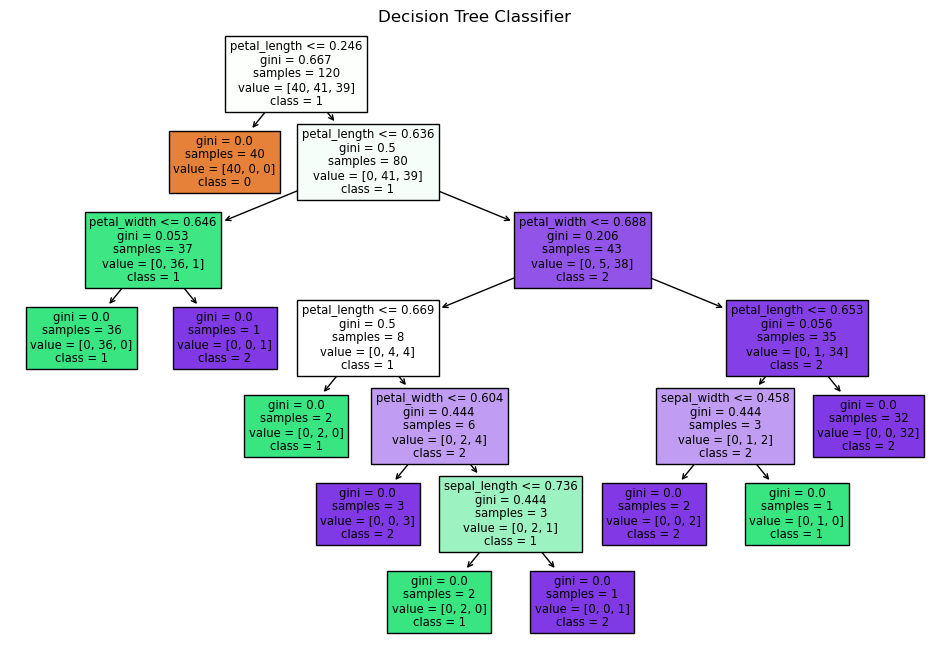

Visualization is supported only for datasets with two features.


In [10]:
import matplotlib.pyplot as plt
from sklearn import tree

class_names_str = y.unique().astype(str)
class_names_list = class_names_str.tolist()

feature_names_list = X.columns.tolist() # Convert feature names to list

plt.figure(figsize=(12, 8))
tree.plot_tree(decision_tree_classifier, feature_names=feature_names_list, class_names=class_names_list, filled=True)
plt.title("Decision Tree Classifier")
plt.show()

# Visualize Decision Boundaries
def plot_decision_boundaries(X, y, classifier, title="Decision Boundaries"):
    # Check if X has more than two features
    if X.shape[1] > 2:
        print("Visualization is supported only for datasets with two features.")
        return

    # Create meshgrid of feature values
    x_min, x_max = X.iloc[:, 0].min() - 0.5, X.iloc[:, 0].max() + 0.5
    y_min, y_max = X.iloc[:, 1].min() - 0.5, X.iloc[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Predict the class for each meshgrid point
    if X.shape[1] == 2:
        Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = classifier.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel())])  # Add zeros for additional dimensions
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)

    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k')     # Plot data points
    plt.title(title)
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.show()

plot_decision_boundaries(X, y, decision_tree_classifier)


ARTIFICIAL NEURAL NETWORK (ANN) CLASSIFIER 

In [11]:
#ANN
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

ann_classifier = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42, max_iter=1000)
ann_classifier.fit(X_train, y_train)

accuracy = ann_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

y_pred = ann_classifier.predict(X_test)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.9666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



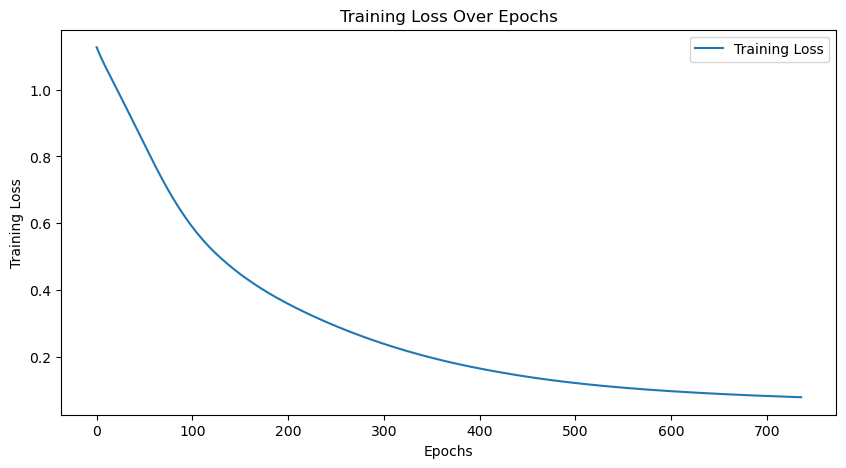

<Figure size 800x600 with 0 Axes>

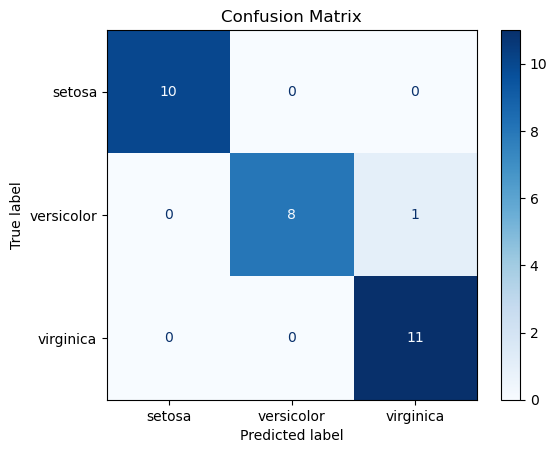

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Ploting training loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(ann_classifier.loss_curve_, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

# Ploting confusion matrix
y_pred = ann_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


SUPPORT VECTOR MACHINE (SVM) CLASSIFIER

In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data = pd.read_csv('creditcard.csv')

missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

numerical_features = data.select_dtypes(include=['float64'])

# Initialize the StandardScaler
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(numerical_features)

data[numerical_features.columns] = scaled_numerical

# Check the class distribution
class_distribution = data['Class'].value_counts()
print("Class Distribution:")
print(class_distribution)

# Split the data into features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



Missing Values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64


In [22]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the dataset
data = pd.read_csv('creditcard.csv')

X = data.drop('Class', axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

selector = SelectKBest(score_func=f_classif, k=10)  # Select top 10 features
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_selected, y_train)
y_pred = svm_classifier.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Accuracy: 0.999385555282469
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.82      0.82        98

    accuracy                           1.00     56962
   macro avg       0.91      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56847    17]
 [   18    80]]


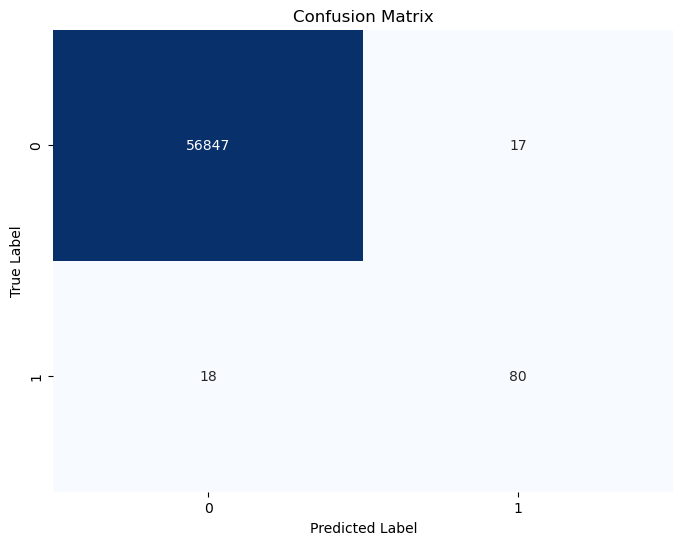

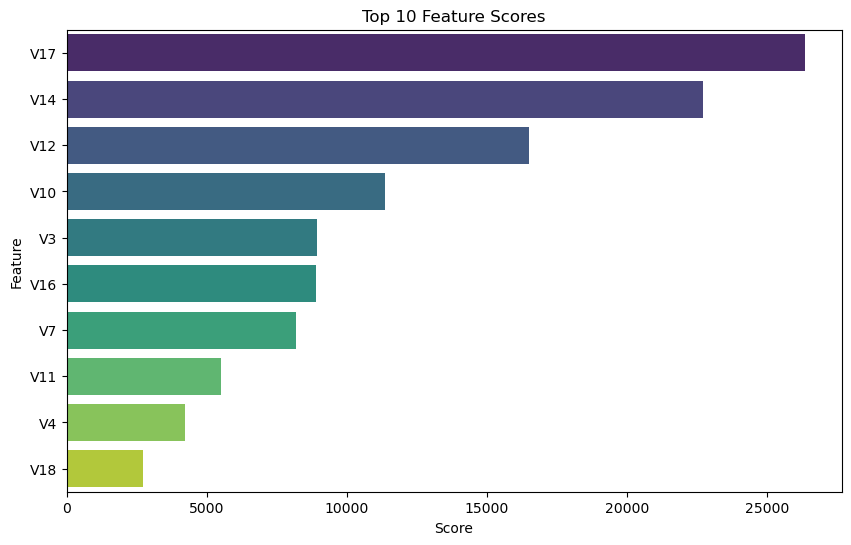

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Bar chart for feature scores
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
feature_scores = feature_scores.sort_values(by='Score', ascending=False).head(10)  # Select top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Feature', data=feature_scores, palette='viridis')
plt.title('Top 10 Feature Scores')
plt.xlabel('Score')
plt.ylabel('Feature')
plt.show()


ENSEMBLE CLASSIFIERS

In [24]:
# ensemble
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split


data = pd.read_csv('ensemble.csv')

missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

# Convert categorical variables into numerical format using LabelEncoder
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])
data['Partner'] = label_encoder.fit_transform(data['Partner'])
data['Dependents'] = label_encoder.fit_transform(data['Dependents'])
data['PhoneService'] = label_encoder.fit_transform(data['PhoneService'])
data['MultipleLines'] = label_encoder.fit_transform(data['MultipleLines'])
data['InternetService'] = label_encoder.fit_transform(data['InternetService'])
data['OnlineSecurity'] = label_encoder.fit_transform(data['OnlineSecurity'])
data['OnlineBackup'] = label_encoder.fit_transform(data['OnlineBackup'])
data['DeviceProtection'] = label_encoder.fit_transform(data['DeviceProtection'])
data['TechSupport'] = label_encoder.fit_transform(data['TechSupport'])
data['StreamingTV'] = label_encoder.fit_transform(data['StreamingTV'])
data['StreamingMovies'] = label_encoder.fit_transform(data['StreamingMovies'])
data['Contract'] = label_encoder.fit_transform(data['Contract'])
data['PaperlessBilling'] = label_encoder.fit_transform(data['PaperlessBilling'])
data['PaymentMethod'] = label_encoder.fit_transform(data['PaymentMethod'])
data['Churn'] = label_encoder.fit_transform(data['Churn'])

numerical_features = data.select_dtypes(include=['float64', 'int64'])


scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(numerical_features)
data[numerical_features.columns] = scaled_numerical

# 4. Handling Class Imbalance (if necessary)
# Check the class distribution
class_distribution = data['Churn'].value_counts()
print("Class Distribution:")
print(class_distribution)

X = data.drop('Churn', axis=1)
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



Missing Values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
Class Distribution:
Churn
0    5174
1    1869
Name: count, dtype: int64


Random Forest Classifier:
Accuracy: 0.7934705464868701
Classification Report:
              precision    recall  f1-score   support

          No       0.83      0.90      0.87      1035
         Yes       0.65      0.49      0.56       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409

Confusion Matrix:
[[936  99]
 [192 182]]


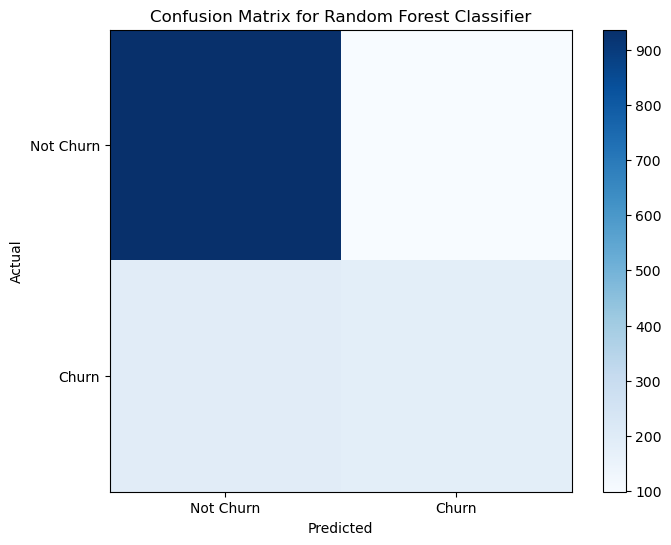


Gradient Boosting Classifier:
Accuracy: 0.7998580553584103
Classification Report:
              precision    recall  f1-score   support

          No       0.84      0.91      0.87      1035
         Yes       0.66      0.51      0.57       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

Confusion Matrix:
[[938  97]
 [185 189]]


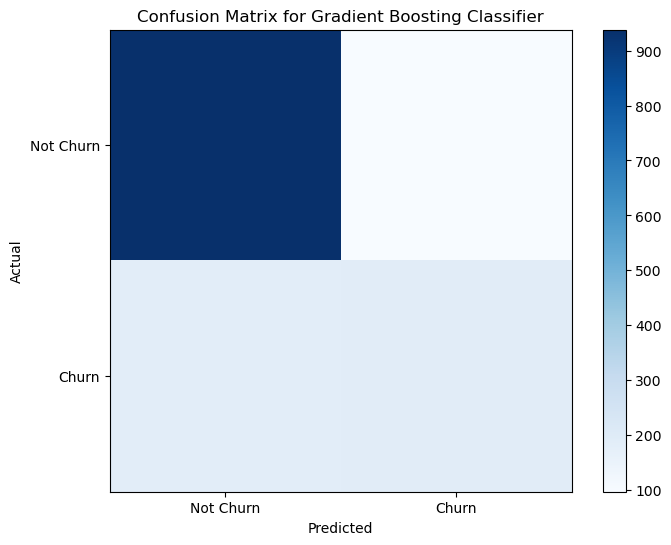

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


data = pd.read_csv('ensemble.csv')

X = data.drop('Churn', axis=1)
y = data['Churn']

# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()
for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = label_encoder.fit_transform(X[column])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_rf)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0, 1], ['Not Churn', 'Churn'])
plt.yticks([0, 1], ['Not Churn', 'Churn'])
plt.show()


gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)
gradient_boosting.fit(X_train, y_train)
y_pred_gb = gradient_boosting.predict(X_test)

print("\nGradient Boosting Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:")
print(classification_report(y_test, y_pred_gb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_gb)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0, 1], ['Not Churn', 'Churn'])
plt.yticks([0, 1], ['Not Churn', 'Churn'])
plt.show()


K NEAREST NEIGHBOUR (KNN) CLASSIFIER

In [26]:
# K
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('data.csv')

data = data.drop(columns=['Unnamed: 32'])
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

data = data.dropna()
X = data.drop(columns=['diagnosis'])  # Features
y = data['diagnosis']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Missing Values:
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


Accuracy: 0.9473684210526315


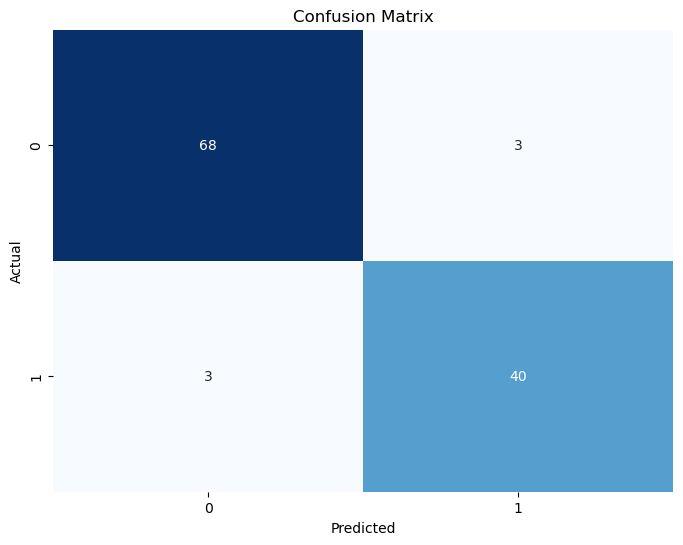

Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.96      0.96        71
           M       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))


LINEAR REGRESSION AND LOGISTIC REGRESSION

In [34]:
#Linear
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

boston_data = pd.read_csv('BostonHousing.csv')

boston_data = boston_data.dropna()

X = boston_data.drop('medv', axis=1)
y = boston_data['medv']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 20.68772047304852
R-squared: 0.7200277678580311


Linear Regression:
Mean Squared Error (Linear Regression): 20.68772047304852
R-squared (Linear Regression): 0.7200277678580311

Classification Report for Linear Regression:
Not applicable for regression problems.

Logistic Regression:
Accuracy (Logistic Regression): 0.8811881188118812

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        53
           1       0.88      0.88      0.88        48

    accuracy                           0.88       101
   macro avg       0.88      0.88      0.88       101
weighted avg       0.88      0.88      0.88       101



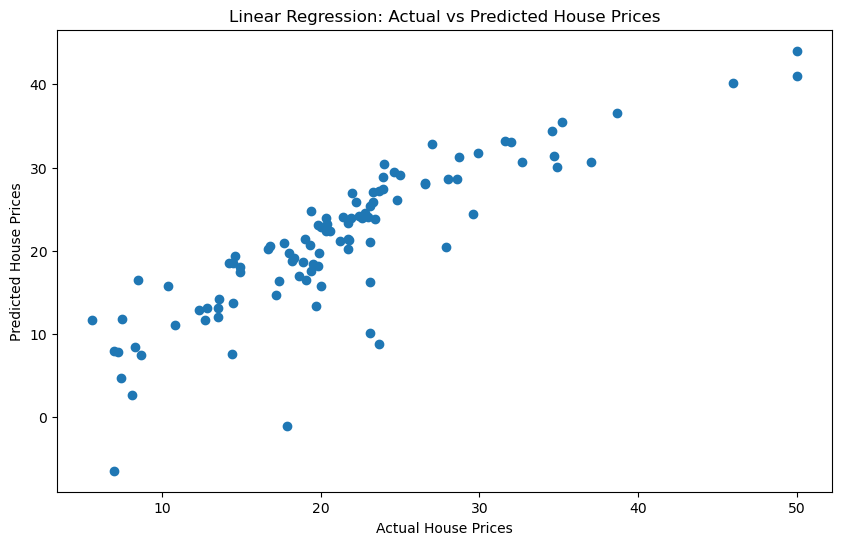

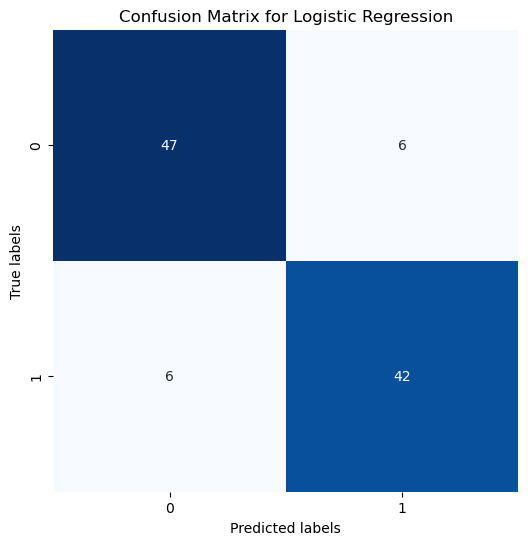

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

boston_data = pd.read_csv('BostonHousing.csv')

boston_data = boston_data.dropna()

X = boston_data.drop('medv', axis=1)
y = boston_data['medv']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Linear Regression
print("Linear Regression:")
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print("Mean Squared Error (Linear Regression):", mse_linear)
print("R-squared (Linear Regression):", r2_linear)

print("\nClassification Report for Linear Regression:")
print("Not applicable for regression problems.")

median_price = boston_data['medv'].median()
y_binary = (y > median_price).astype(int)

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_scaled, y_binary, test_size=0.2, random_state=42)

# Logistic Regression
print("\nLogistic Regression:")
logistic_model = LogisticRegression()
logistic_model.fit(X_train_cls, y_train_cls)
y_pred_logistic = logistic_model.predict(X_test_cls)
accuracy_logistic = accuracy_score(y_test_cls, y_pred_logistic)
print("Accuracy (Logistic Regression):", accuracy_logistic)

print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test_cls, y_pred_logistic))

# Scatter plot for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Linear Regression: Actual vs Predicted House Prices")
plt.show()

# Confusion matrix for Logistic Regression
plt.figure(figsize=(6, 6))
cm = confusion_matrix(y_test_cls, y_pred_logistic)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


Naïve Bayes Classifier

In [36]:
import pandas as pd
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')

dataset_path = 'navB.csv'
dataset = pd.read_csv(dataset_path, encoding='latin', header=None)

dataset.columns = ['target', 'id', 'date', 'flag', 'user', 'text']
dataset.drop(columns=['id', 'date', 'flag', 'user'], inplace=True)
dataset.dropna(inplace=True)

def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    text = text.lower()  # Convert text to lowercase
    return text

dataset['clean_text'] = dataset['text'].apply(clean_text)

# Tokenization
dataset['tokens'] = dataset['clean_text'].apply(lambda x: x.split())

# Remove stopwords
stop_words = set(stopwords.words('english'))
dataset['clean_tokens'] = dataset['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# Instantiate CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(dataset['clean_text'])

print("Shape of the document-term matrix:", X.shape)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Electrova\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Shape of the document-term matrix: (1600000, 735112)


Accuracy: 0.78234375


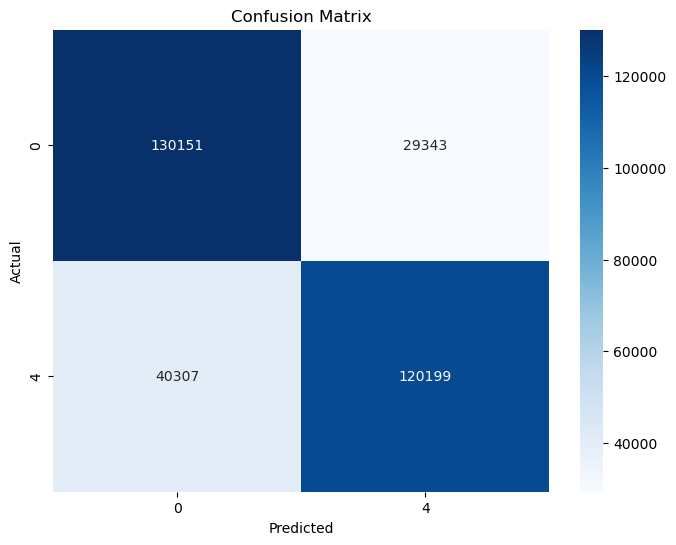

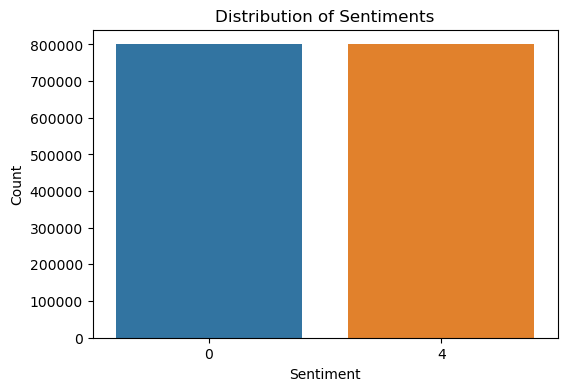

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB  # Add this import
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Plot distribution of target classes
def plot_class_distribution(y):
    plt.figure(figsize=(6, 4))
    sns.countplot(x=y)
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.title('Distribution of Sentiments')
    plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, dataset['target'], test_size=0.2, random_state=42)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

plot_confusion_matrix(y_test, y_pred, labels=[0, 4])

plot_class_distribution(dataset['target'].values)


Overall Comparison:

Complexity: Neural networks and ensemble methods (Random Forest, Gradient Boosting) are more complex but can capture complex patterns in data. Naïve Bayes and decision trees are simpler but may not capture intricate relationships.

Interpretability: Decision trees, linear regression, and logistic regression are more interpretable compared to neural networks and ensemble methods.

Scalability: Naïve Bayes and decision trees are generally faster and more scalable compared to neural networks and some ensemble methods like gradient boosting.

Robustness: Ensemble methods like Random Forest and Gradient Boosting are more robust to noise and outliers compared to individual classifiers like Naïve Bayes and SVM.

Data Requirements: Neural networks require a large amount of data for effective training, while simpler algorithms like Naïve Bayes can work well with smaller datasets.